Parsing log file: D:\mmaction2\work_dirs\my_stgcnpp\20250713_144119\20250713_144119.log


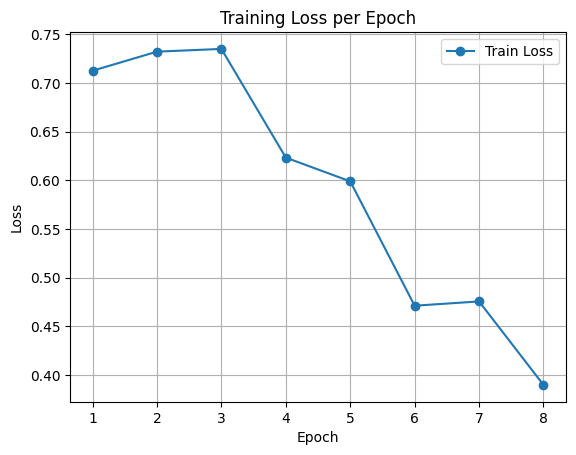

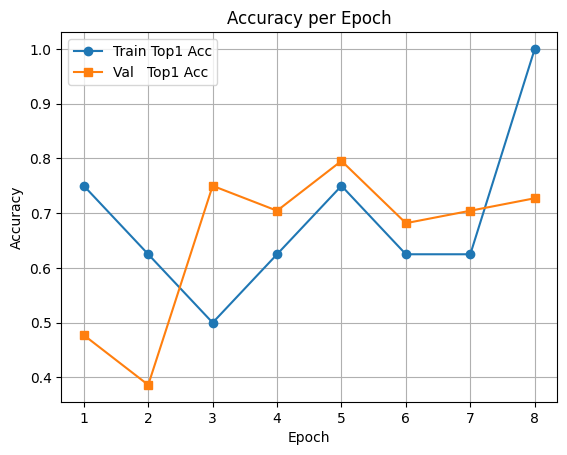

In [ ]:
import re
from pathlib import Path
import matplotlib.pyplot as plt

# 1) 사용자 정의: 학습 작업 디렉터리 경로 (수정된 부분)
base_work_dir = Path(r'D:\mmaction2\work_dirs\my_stgcnpp')
if not base_work_dir.exists() or not base_work_dir.is_dir():
    raise FileNotFoundError(f"Base directory not found: {base_work_dir}")

# base_work_dir 내에서 숫자 형식의 폴더 중 가장 큰 번호를 가진 폴더 찾기
# '20250713_144119'와 같은 'YYYYMMDD_HHMMSS' 형식의 폴더를 가정합니다.
sub_dirs = [d for d in base_work_dir.iterdir() if d.is_dir() and re.fullmatch(r'\d{8}_\d{6}', d.name)]

if not sub_dirs:
    raise FileNotFoundError(f"No timestamped subdirectories found in {base_work_dir}")

# 폴더 이름(문자열)을 기준으로 정렬하여 가장 큰(최신) 폴더 선택
work_dir = max(sub_dirs, key=lambda p: p.name)
print(f"Automatically selected the latest work directory: {work_dir}")

# 2) .log 파일 찾기
log_files = list(work_dir.glob('*.log'))
if not log_files:
    raise FileNotFoundError(f"No .log file found in {work_dir}")
log_file = max(log_files, key=lambda p: p.stat().st_mtime)
print(f"Parsing log file: {log_file}")

# 3) 정규 표현식 패턴 정의
train_pattern = re.compile(
    r"Epoch\(train\)\s*\[(\d+)\]\[\d+/\d+\].*?loss:\s*([\d\.]+)\s+top1_acc:\s*([\d\.]+)"
)
val_pattern = re.compile(
    r"Epoch\(val\)\s*\[(\d+)\]\[\d+/\d+\].*?acc/top1:\s*([\d\.]+)"
)

# 4) 로그 파싱 (errors='ignore' 옵션 추가)
train_epochs, train_losses, train_accs = [], [], []
val_epochs, val_accs = [], []

with open(log_file, 'r', encoding='utf-8', errors='ignore') as f:
    for line in f:
        t = train_pattern.search(line)
        if t:
            epoch = int(t.group(1))
            loss  = float(t.group(2))
            acc   = float(t.group(3))
            train_epochs.append(epoch)
            train_losses.append(loss)
            train_accs.append(acc)
        v = val_pattern.search(line)
        if v:
            epoch = int(v.group(1))
            acc   = float(v.group(2))
            val_epochs.append(epoch)
            val_accs.append(acc)

# 5) 시각화: Training Loss per Epoch
plt.figure()
plt.plot(train_epochs, train_losses, marker='o', label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.grid(True)
plt.legend()
plt.show()

# 6) 시각화: Accuracy per Epoch
plt.figure()
plt.plot(train_epochs, train_accs, marker='o', label='Train Top1 Acc')
plt.plot(val_epochs,   val_accs,   marker='s', label='Val   Top1 Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.grid(True)
plt.legend()
plt.show()